In [1]:
from netCDF4 import *
import matplotlib.pyplot as plt
import matplotlib.colors as co
import matplotlib.ticker as ticker
from path import Path
import xarray as xr
import numpy as np
import math
import scipy.interpolate as interp
import scipy.stats as stats
import tkinter as tk
import pandas as pd

from matplotlib import rc
font = {"family": "serif", "weight": "normal", "size": 13}
rc("font", **font)
rc("text", usetex=True)

### Spectrum plotting function 

In [2]:
def plot_spectrum(file,name,color = (1,0,0),evolution = False,instant =False,adjust = 0): 
    # file takes the name of the csv source file, name is the legend name, color of the plot, evolution boolean to plot the evolution or only the last spectrum
    path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\\Work\\Github\\Simulation\\Submesoscale simulation\\Forcing\\comparison_spectrum\\" + file + ".csv")
    df = pd.read_csv(path)
    ax = plt.gca()
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(3e3,1e5)
    
    if evolution :
        size = len(df.keys()) 
        for i in range(1,size-adjust-1) :
            if i == size-adjust-2 :
                #legend shows only the last spectrum of a series
                ax.plot(df["characteristic_length"], df[str(i)],color = (color[0],color[1],color[2],i/(size-adjust)),label = name)
            else :
                ax.plot(df["characteristic_length"], df[str(i)],color = (color[0],color[1],color[2],i/(size-adjust)))
    elif instant :
        ax.plot(df["characteristic_length"], df[str(len(df.keys())-2)],color = (color[0],color[1],color[2]),label = name) 
    else :
        ax.plot(df["characteristic_length"], df[str(0)],color = (color[0]*0.5,color[1]*0.5,color[2]*0.5),label = "$t = 0.10.t_{end}$, "+name)
        ax.plot(df["characteristic_length"], df[str(len(df.keys())-2)],color = (color[0],color[1],color[2]),label = "$t = t_{end}$, "+name) 
    ax.legend(loc = 'lower right')
    ax.set_ylabel('Energy Density Spectrum')
    ax.set_xlabel('Characteristic length (m)')

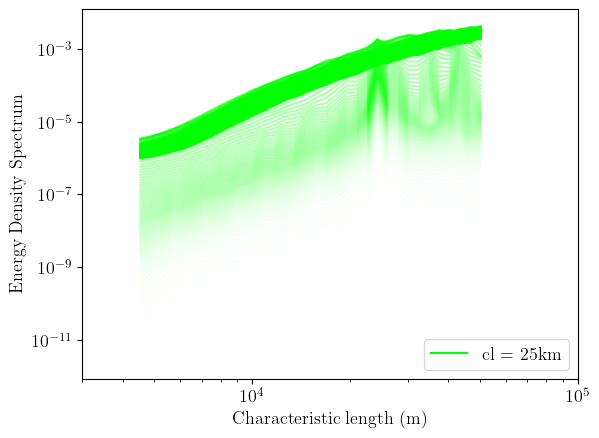

In [6]:
# plot_spectrum("EDS_K55km","cl = 55km",(1,0,0),evolution=True)
plot_spectrum("EDS_K25km","cl = 25km",(0,1,0),evolution=True)
# plot_spectrum("EDS_K12.5km","cl = 12.5km",(0,0,1),evolution=True)
# plot_spectrum("EDS_K25km","l = 12.5km",(0,0,1),evolution=True,adjust = 30)
# plot_spectrum("EDS_LO_86400","T = 1 day",(1,0,0),evolution=True)
# plot_spectrum("EDS_LO_8640","T = 0.1 day",(0,0,1),evolution=True)
# plot_spectrum("EDS_K0","Null forcing",(0,1,0),evolution=True)
# plot_spectrum("EDS_LO_CI","LO Initial conditions",(1,0,0),evolution=True)
# plot_spectrum("EDS_LO_CI_f86400_long","LO Initial conditions + forcing strong",(1,0,0),evolution=True)
# plot_spectrum("EDS_LO_CI_f172800_long","LO Initial conditions + forcing weak",(0,0,1),evolution=True)
# plot_spectrum("EDS_LO_CI_f86400","LO Initial conditions + forcing",(1,0,0),evolution=True)
# plot_spectrum("EDS_LO_CI_f","LO_ Initial conditions w forcing",(1,0,0),evolution=True)
# plot_spectrum("EDS_LO_Seeding","Lamb Oseen forcing",(1,0,0),evolution=True)
# plot_spectrum("EDS_2022_Winter","Winter 2022",(0,0,1),evolution=False,instant=True)
# plot_spectrum("EDS_2022_Springred","Spring 2022, domain focused",(0,1,0),evolution=False,instant=True)
# plot_spectrum("EDS_2023_Springred","Spring 2023 red",(0,1,0),evolution=False)
# plot_spectrum("EDS_2022_Springred","Spring 2022",(0,1,0),evolution=False,instant=True)
# plot_spectrum("EDS_2022_Spring","Spring 2022",(0,1,0),evolution=False,instant=True)
# plot_spectrum("EDS_2023_Spring","Spring 2023",(0,0,1),evolution=False)
# plot_spectrum("EDS_2024_Spring","Spring 2024",(0,0,1),evolution=False)
# plot_spectrum("EDS_2022_Autumn","Autumn 2022",(1,0.5,0),evolution=False,instant=True)
# plot_spectrum("EDS_2022_Summer","Summer 2022",(1,0,0),evolution=False,instant=True)
# plt.savefig("Spectrum_comparison.pdf")